<a href="https://colab.research.google.com/github/isaacmsl/mnist-classifiers-california-housing-regressors/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True, as_frame=True)

In [157]:
X.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


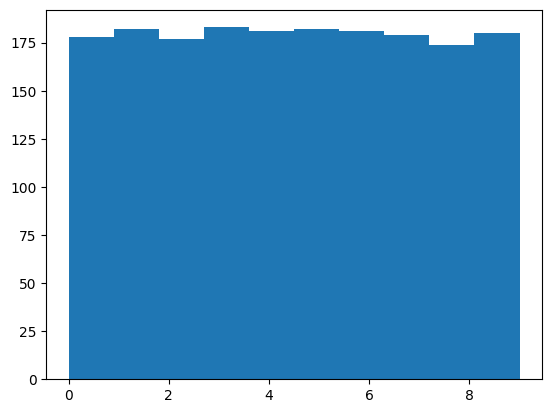

In [158]:
# plot y
import matplotlib.pyplot as plt

plt.hist(y)
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler

def normalize_data(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    return scaler.transform(X_train), scaler.transform(X_test)

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_norm, X_test_norm = normalize_data(X_train, X_test)

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def fit_grid_search_cv(classifier, param_grid, X_train, y_train, grid_search_n_jobs=-1):
    grid_search = GridSearchCV(
        classifier,
        param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=grid_search_n_jobs,
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    return grid_search

# DecisionTree Training

In [167]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_cv_dt = fit_grid_search_cv(DecisionTreeClassifier(), param_grid, X_train_norm, y_train, grid_search_n_jobs=2)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


# SVC Training

In [168]:
from sklearn.svm import SVC

param_grid = {
    'C': [1, 10, 100, 1000],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.0001]
}

grid_search_cv_svc = fit_grid_search_cv(SVC(), param_grid, X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


# LogisticRegression Training

In [170]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    "C": [0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],
    "max_iter": [1000, 5000],
    "n_jobs": [-1]
}

grid_search_cv_lr = fit_grid_search_cv(LogisticRegression(), param_grid, X_train_norm, y_train, grid_search_n_jobs=2)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


# Results

In [177]:
print("DecisionTreeClassifier")
print(grid_search_cv_dt.best_params_)
print("Accuracy (best score):", grid_search_cv_dt.best_score_)

print("SVC")
print(grid_search_cv_svc.best_params_)
print("Accuracy (best score):", grid_search_cv_svc.best_score_)

print("LogisticRegression")
print(grid_search_cv_lr.best_params_)
print("Accuracy (best score):", grid_search_cv_lr.best_score_)


DecisionTreeClassifier
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy (best score): 0.859429366736256
SVC
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy (best score): 0.9888656924147531
LogisticRegression
{'C': 1, 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy (best score): 0.9582463465553236


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


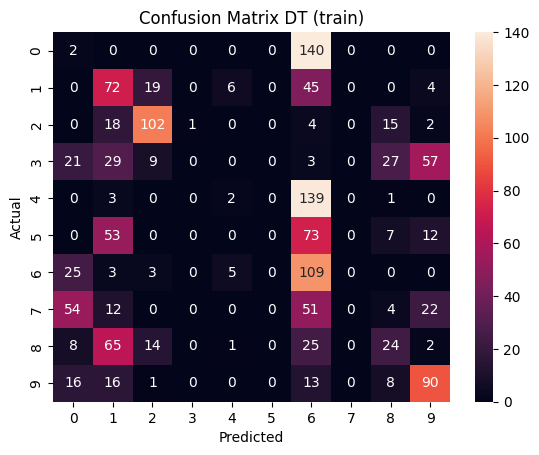

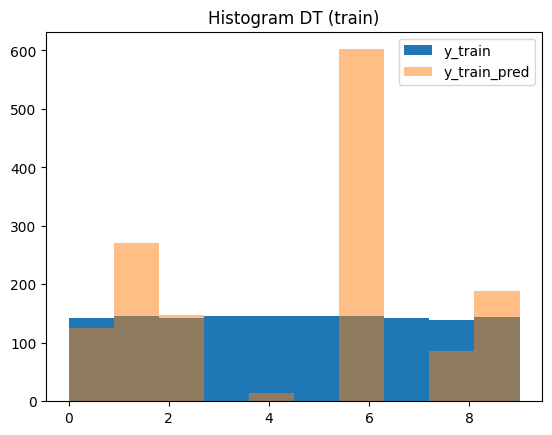

In [176]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = grid_search_cv_dt.best_estimator_

y_train_pred = model.predict(X_train)

plt.title("Confusion Matrix DT (train)")
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.title("Histogram DT (train)")
plt.hist(y_train, label="y_train")
plt.hist(y_train_pred, label="y_train_pred", alpha=0.5)
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


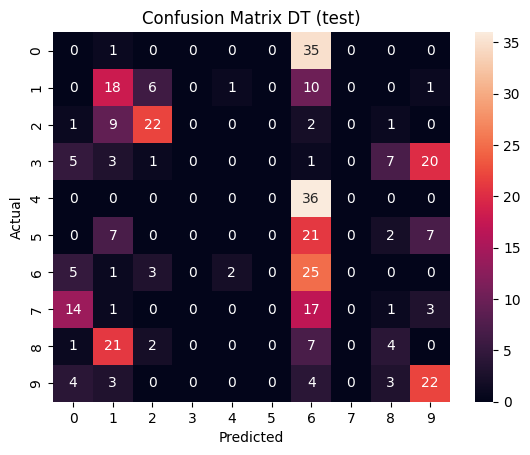

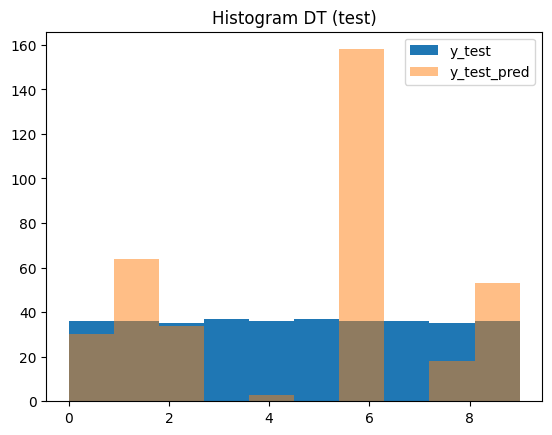

In [179]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = grid_search_cv_dt.best_estimator_

y_test_pred = model.predict(X_test)

plt.title("Confusion Matrix DT (test)")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.title("Histogram DT (test)")
plt.hist(y_test, label="y_test")
plt.hist(y_test_pred, label="y_test_pred", alpha=0.5)
plt.legend()
plt.show()

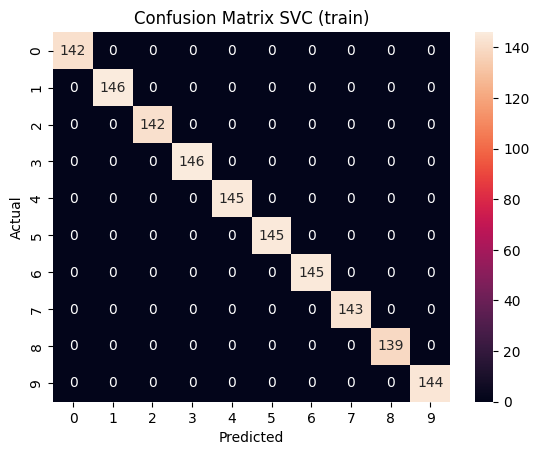

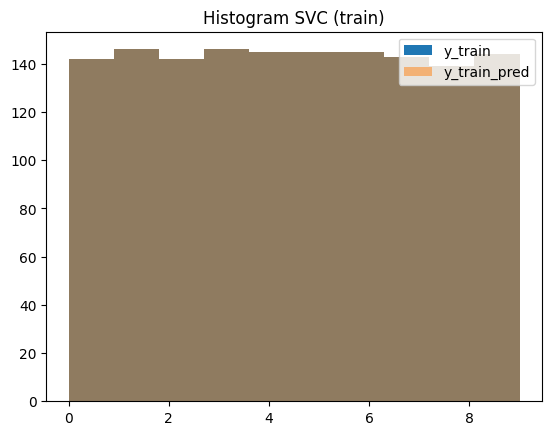

In [180]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = grid_search_cv_svc.best_estimator_

y_train_pred = model.predict(X_train)

plt.title("Confusion Matrix SVC (train)")
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.title("Histogram SVC (train)")
plt.hist(y_train, label="y_train")
plt.hist(y_train_pred, label="y_train_pred", alpha=0.5)
plt.legend()
plt.show()

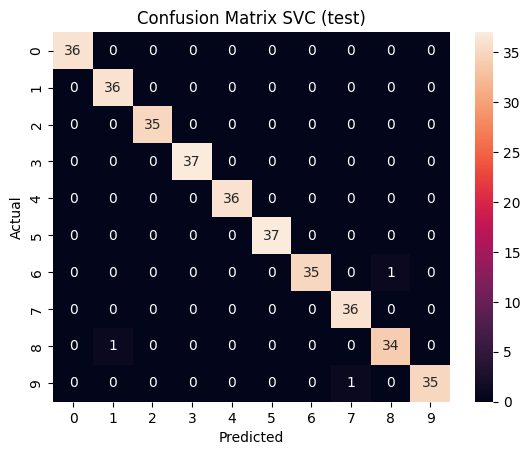

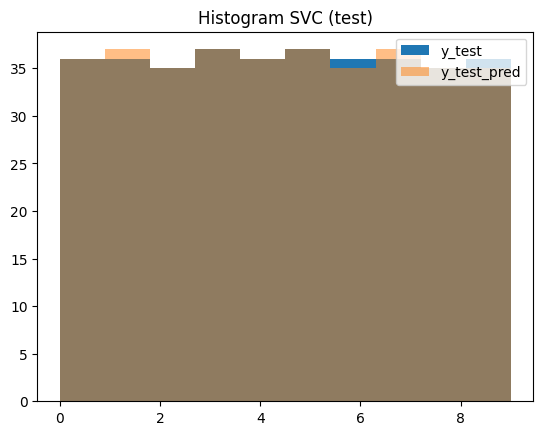

In [181]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = grid_search_cv_svc.best_estimator_

y_test_pred = model.predict(X_test)

plt.title("Confusion Matrix SVC (test)")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.title("Histogram SVC (test)")
plt.hist(y_test, label="y_test")
plt.hist(y_test_pred, label="y_test_pred", alpha=0.5)
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


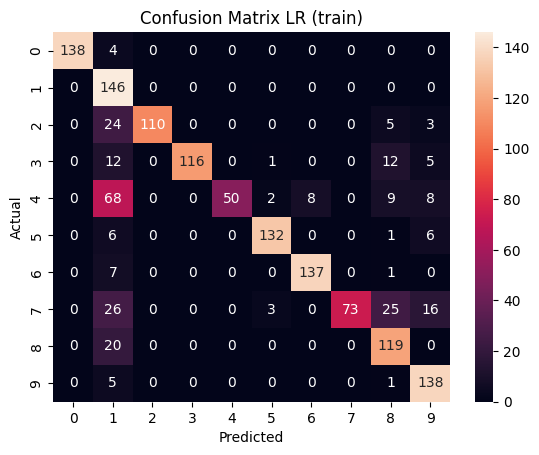

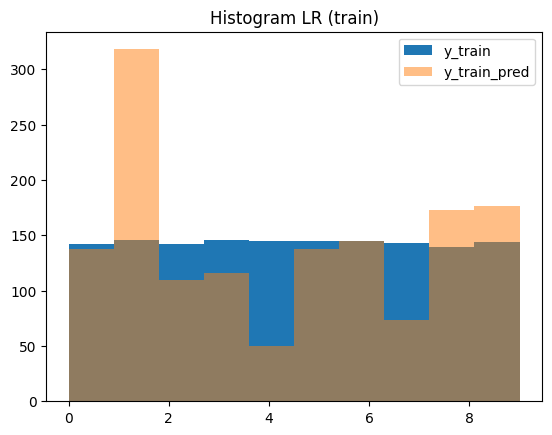

In [182]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = grid_search_cv_lr.best_estimator_

y_train_pred = model.predict(X_train)

plt.title("Confusion Matrix LR (train)")
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.title("Histogram LR (train)")
plt.hist(y_train, label="y_train")
plt.hist(y_train_pred, label="y_train_pred", alpha=0.5)
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


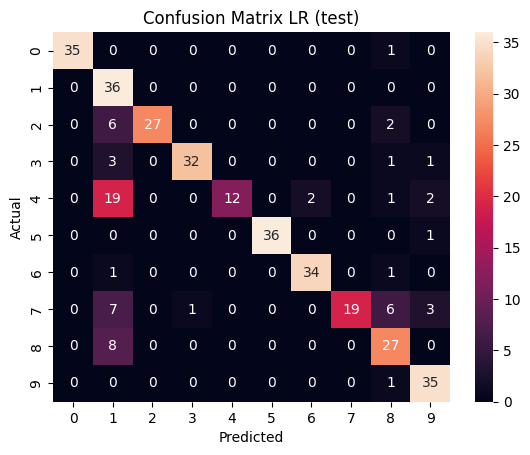

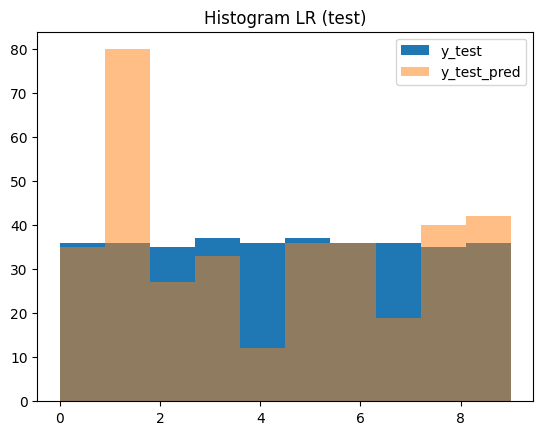

In [183]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = grid_search_cv_lr.best_estimator_

y_test_pred = model.predict(X_test)

plt.title("Confusion Matrix LR (test)")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.title("Histogram LR (test)")
plt.hist(y_test, label="y_test")
plt.hist(y_test_pred, label="y_test_pred", alpha=0.5)
plt.legend()
plt.show()